# AIA21  - Session06  

# **Create images dataset**

In [31]:
!pip install geocoder osmnx
!pip install matplotlib==3.1.3
!pip install graphviz
!pip install cgraph
!apt install libgraphviz-dev
!pip install pygraphviz 
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
import urllib
%matplotlib inline 
import matplotlib.pyplot as plt
import geocoder
from tqdm import tqdm
import pandas as pd
import numpy as np
import shapely
import geopandas as gpd
import copy
import geocoder
import time

In [33]:
from google.colab import drive

mount_point = '/content/gdrive'
drive.mount(mount_point)

Mounted at /content/gdrive


#**GAN MODEL**

**Refrence Notebook** : https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/dcgan.ipynb

In [34]:
!pip install sknw
!pip install -U scikit-image
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' #unuse GPU

NameError: ignored

In [35]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13343607506704330352
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1967216980583851573
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [36]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers


from IPython import display
import tensorflow as tf
import numpy as np
import time

import networkx as nx
%matplotlib inline 
import matplotlib.pyplot as plt
from io import BytesIO
from zipfile import ZipFile
import urllib

from PIL import Image
from numpy import asarray
from tqdm import tqdm
from matplotlib import pyplot
from skimage import color
from skimage import io


from skimage.morphology import skeletonize
#import sknw


/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


▶ in Case you installed Tensorflow-GPU , but you want to use the CPU

In [37]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [38]:
import os

**Load Data**

In [ ]:
%%script echo
directory = "/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/data/imgKoshigaya/"
all_data=[]
for filename in os.listdir(directory):
    if filename.endswith(".png"):
       img = filename
       all_data.append(filename)
      

In [ ]:
%%script echo
all_data=[]
for image_file in all_data:
  img = Image.open(image_file)
  img = img.resize((500, 500))
  img=np.asarray(img)
  numpydata = color.rgb2gray(color.rgba2rgb(img))
  all_data.append(numpydata)

In [ ]:
path=r"/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/data/imgKoshigaya/*.*"
all_data=[]

for image_file in glob.glob(path):
  img = Image.open(image_file)
  #resize
  img = img.resize((500, 500))
  
  #Convert RGBA to gray
  img=np.asarray(img)
  numpydata = color.rgb2gray(color.rgba2rgb(img))
  all_data.append(numpydata)

In [ ]:
len(all_data)

In [ ]:
all_data[0].max()  #already sacled

In [ ]:
all_data[0].shape #image size

In [ ]:
output_strides=16

In [ ]:
if all_data[0].shape[0] % output_strides != 0:
  final_shaped_data=[]
  for i in all_data:

    hv_stack_shape=output_strides-(all_data[0].shape[0] % output_strides)

    h_stack=np.ones((i.shape[0],hv_stack_shape))
    new_array=np.hstack((i,h_stack))  #not inplace

    v_stack=np.ones((hv_stack_shape,new_array.shape[1]))
    new_array=np.vstack((new_array,v_stack))  #not inplace
    final_shaped_data.append(new_array)

  all_data=final_shaped_data

In [ ]:
all_data[0].shape #1 channel

In [ ]:
train_tensors=np.asarray(all_data)
train_tensors.shape #(number of samples, height, width, number of channels )

**Normalize, Shuffle and Batch Data**

In [ ]:
train_tensors = train_tensors.reshape(train_tensors.shape[0], train_tensors.shape[1], train_tensors.shape[2],1).astype('float32')
train_tensors.shape

(1021, 512, 512, 1)

In [ ]:
#train_tensors=(train_tensors-127.5) /127.5


In [ ]:
train_tensors[0].max()

1.0

In [ ]:
np.isnan(train_tensors)

array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]],


       [[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [Fa

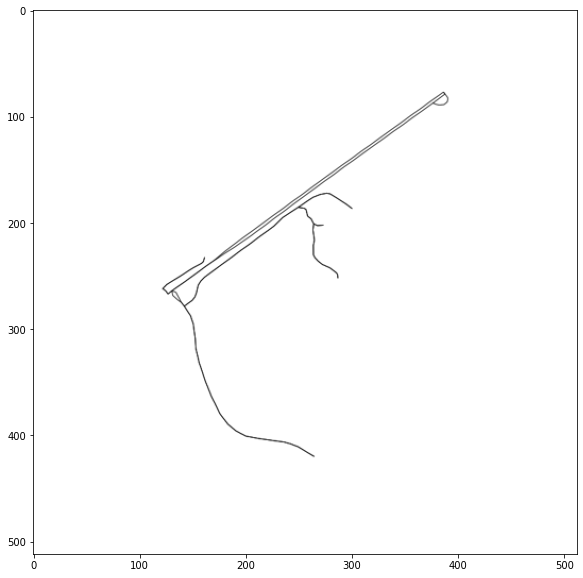

In [ ]:
#check a sample after normalization
fig1, ax1 = plt.subplots(figsize=(10,10) )
plt.imshow(train_tensors[444,:,:,0],cmap='gray')

**Parameters and Hyperparameters**

In [ ]:
TENSOR_H=train_tensors.shape[1]
TENSOR_W=train_tensors.shape[2]
TENSOR_C=train_tensors.shape[3]

BATCH_SIZE=20    #increase it when increasing the dataset 
BUFFER_SIZE=100  #increase it when increasing the dataset 
latent_dim=100

save_every=50    #increase it when increasing the dataset 

**Batch and shuffle data**

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_tensors).shuffle(BUFFER_SIZE).batch(BATCH_SIZE) 

**Build the Generator**

***You can improve the architecture if the model, depnding on the image size, and avilable resources***

In [ ]:
kernel_initializer=tf.initializers.RandomNormal(mean=0.0 , stddev=0.02)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(int(TENSOR_H/8)*int(TENSOR_W/8)*256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((int(TENSOR_H/8), int(TENSOR_W/8), 256)))
    assert model.output_shape == (None, int(TENSOR_H/8), int(TENSOR_W/8), 256)  # Note: None is the batch size


    model.add(layers.Conv2DTranspose(256, (3,3), strides=(1, 1), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/8),int(TENSOR_W/8), 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(128, (3,3), strides=(1, 1), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/8),int(TENSOR_W/8), 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    #kernel_initializer=w_init

    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/4), int(TENSOR_W/4), 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(1,1), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/4), int(TENSOR_W/4), 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/2), int(TENSOR_W/2), 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same'))
    assert model.output_shape == (None, TENSOR_H, TENSOR_W, 16)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    #convolution
    model.add(layers.Conv2D(TENSOR_C, (3,3), padding='same', strides=(1,1) , use_bias=False, activation='sigmoid' ))
    assert model.output_shape == (None, TENSOR_H,TENSOR_W, TENSOR_C)


    return model

**Test- not trained yet**

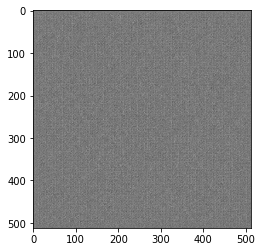

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0,:,:,0] ,cmap='gray')


In [ ]:
generated_image[0,:,:,0].dtype

tf.float32

**Build the Discriminator**

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[TENSOR_H, TENSOR_W, TENSOR_C]))

    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1,activation="sigmoid"))

    return model

**Test - not trained yet**

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.506523]], shape=(1, 1), dtype=float32)


**Define the loss and optimizer**

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(0.00005,beta_1=.5)
discriminator_optimizer = tf.keras.optimizers.Adam(0.00005,beta_1=.5)

**Save checkpoints**

In [ ]:
checkpoint_dir  ='/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

**Define the training loop**

In [ ]:
EPOCHS = 10000
noise_dim = latent_dim
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,epoch + 1,seed)

    # Save the model every number of epochs
    if (epoch + 1) % save_every == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,epochs,seed)

**Generate and save images**

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0]  , cmap='gray')
      plt.axis('off')

  plt.savefig('/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/training_checkpoints/img/image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

**Train the model**

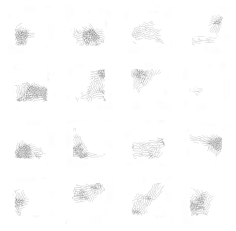

Time for epoch 3391 is 22.25091862678528 sec


In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
generator.save("generator_model1.h5")

**Load the model**

In [ ]:
# example of loading the generator model and generating images
import os
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot


In [ ]:
n_samples = 20

In [ ]:
# load model
model = load_model('/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/training_checkpoints/ckpt-67.data-00000-of-00001')


OSError: ignored

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	return z_input

In [ ]:
latent_points = generate_latent_points(100, 25)
# generate images
X  = model.predict(latent_points)


X = np.rint(X)

# plot the result
plot_samples(X, 5)


NameError: ignored

In [ ]:
graph_generator = tf.keras.models.load_model("generator_model1.h5")

OSError: ignored

(-0.5, 511.5, 511.5, -0.5)

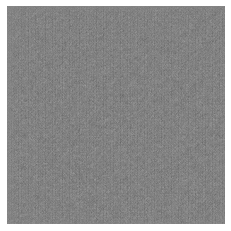

In [ ]:
gen=graph_generator( tf.random.normal([1, 100]),training=False)
fig = plt.figure(figsize=(4, 4))

plt.imshow(gen[0, :, :, 0] , cmap='gray')
plt.axis('off')

In [ ]:
ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint)
    # You can also access previous checkpoints like this: ckpt_manager.checkpoints[3]
    print ('Latest checkpoint restored!!')
    batch_size = 1
    latent_dim = 100
    noise = tf.random.normal([batch_size, latent_dim])
    generated_images = generator(noise, training=False)
    #ax = subplots(figsize=(50, 50))
    plt.rcParams["figure.figsize"] = [20, 20]
    plt.imshow(generated_images[0, :, :, 0] , cmap='gray', extent=[-4, 4, -1, 1], aspect=4)
    plt.axis('off')

In [ ]:
discriminator(gen)

#**Image to graph**

In [1]:
!pip install sknw
!pip install -U scikit-image
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sknw: filename=sknw-0.14-py3-none-any.whl size=3383 sha256=378986b5e59253d7e595d878da2847e53e1f32e12529e5a095d7e140312bd5ea
  Stored in directory: /root/.cache/pip/wheels/ca/bf/7b/5029002abec61d97b957427f4fd20426707486d99542feb85d
Successfully built sknw
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.5 MB 11.7 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in i

In [2]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
from PIL import Image
from numpy import asarray
from skimage.morphology import skeletonize
from skimage import data
import sknw
import numpy as np
import networkx as nx
%matplotlib inline 
import matplotlib.pyplot as plt
import osmnx as ox

<class 'numpy.ndarray'>
(1101, 1101, 4)
(1101, 1101)
(1101, 1101, 1)
<class 'networkx.classes.graph.Graph'>


"\nplt.plot(edges)\n# title and show\nplt.title('Build Graph')\nplt.show()\n"

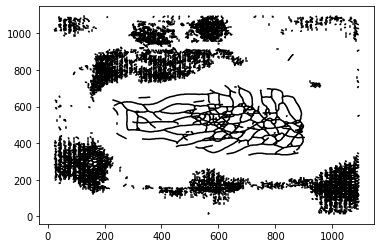

In [39]:
# load the image and convert into
# numpy array




img = Image.open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/ImageGraphGeneration/GeneratedGraphs/8.png", "r")

# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)
  
# <class 'numpy.ndarray'>
print(type(numpydata))
  
#  shape
print(numpydata.shape)

numpydata=numpydata[:,:,0]
print(numpydata.shape)
numpydata=np.reshape(numpydata,newshape=(numpydata.shape[0],numpydata.shape[1],1))
print(numpydata.shape)
skee3=skeletonize(~numpydata).astype(np.uint16)


# build graph from skeleton
graph = sknw.build_sknw(skee3)
print(type(graph))


# draw image
#plt.imshow(img, cmap='gray')

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'black')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
c = (ps[:,1], ps[:,0], 'b.')
"""
plt.plot(edges)
# title and show
plt.title('Build Graph')
plt.show()
"""

In [ ]:
#%%script echo
filepath_tag_geojson = '/content/drive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/data/edges.geojson'
edges.to_file(filepath_tag_geojson, driver='GeoJSON')

AttributeError: ignored